<h1>CLASSIFICATION IN PREDICTIVE MODELLING</h1>

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

Unlike regression, the output variable of Classification is a category, not a value, such as "Green or Blue", "fruit or animal", etc. Since the Classification algorithm is a Supervised learning technique, hence it takes labeled input data, which means it contains input with the corresponding output.<br>
The best example of an ML classification algorithm is Email Spam Detector.

The algorithm which implements the classification on a dataset is known as a classifier. There are two types of Classifications:

- <b>Binary Classifier</b>: If the classification problem has only two possible outcomes, then it is called as Binary Classifier.
Examples: YES or NO, MALE or FEMALE, SPAM or NOT SPAM, CAT or DOG, etc.
- <b>Multi-class Classifier</b>: If a classification problem has more than two outcomes, then it is called as Multi-class Classifier.
Example: Classifications of types of crops, Classification of types of music.

There are two major types of checking the Accuracy of Binary Classification namely: 

- <b>Confusion Matrix</b>: The matrix consists of predictions result in a summarized form, which has a total number of correct predictions and incorrect predictions
- <b>Log Loss or Cross-Entropy Loss</b>: It is used for evaluating the performance of a classifier, whose output is a probability value between the 0 and 1. For a good binary Classification model, the value of log loss should be near to 0.
- classification matrix



<hr>
<h1 style='color:blue;text-align:center'>STEPS TO CLASSIFCATION</h1>
<ol>
<li>Fetch the Data</li>
<li>Clean the data according to their data types</li>
<li>Preprocess the data: Label/Binary encode the categorical variables, Changing of Datatype from string type to integer ( as the case might be, etc)</li>
<li>Normalize the data: Ensure the dataset is normally distributed. You can check for normalization using the histogram plot, then normalize left or right skewed features</li>
<li>Treat all outliers</li>
<li>Train the model: Use the training data to fit the linear regression model. The model will find the coefficients (weights) that minimize the residual sum of squares between the observed and predicted values.
</li>
<li>Evaluate the model. Check the performance of the model using metrics such as Calssification Report, Confusion Matrix, and Log Loss.</li>
<li>Use the trained model to make predictions for new, unseen data points.</li>

</ol>
<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Loan_Data.csv')
df.drop(['Loan_ID'], axis = 1, inplace = True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<h1>PREPROCESSING</h1> <hr>

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
numerical = df.select_dtypes(exclude  = 'object') # ............. identify the numerical variables
categorical = df.select_dtypes(include = 'object') # ............ Identify the categorical variables

for i in numerical:
  df[i].fillna(df[i].mean(), inplace = True)

for i in categorical:
  df[i].fillna(df[i].mode()[0], inplace = True)
  
df.isnull().sum().sort_values(ascending = False).head(3)

Gender        0
Married       0
Dependents    0
dtype: int64

In [ ]:
dx = df.copy() #..... Copy data so it wont be messed up

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in categorical:
  dx[i] = lb.fit_transform(dx[i])

In [ ]:
x = dx.drop(['Loan_Status'], axis = 1)
y = dx.Loan_Status

In [ ]:
x.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2


In [ ]:
# Standardize the dataset
# Normalize the Variable Using StandardScaler

from sklearn.preprocessing import StandardScaler # ................................ Import the scaler from sklearn library
scaler = StandardScaler() # ....................................................... instantiate the scaler and save it to a variable name
df_scaled = pd.DataFrame() # .................................................... Create a dataframe to contain the scaled features
for i in x.columns: # ........................................................... Loop through all the columns in x
  df_scaled[[i]] = scaler.fit_transform(x[[i]]) # ...................... Scale them and save them sd columns in the alrerady prerpared dataframe

df_scaled.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1.223298


<h1>MODELLING</h1>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.15, random_state = 3, stratify = y)
print(f"X Train rows and column: {x_train.shape}")
print(f"Y Train rows and column: {y_train.shape}")
print(f"X Test rows and column: {x_test.shape}")
print(f"Y Test rows and column: {y_test.shape}")

X Train rows and column: (521, 11)
Y Train rows and column: (521,)
X Test rows and column: (93, 11)
Y Test rows and column: (93,)


In [ ]:
train = pd.concat([x_train, y_train], axis = 1) # ...............................Join the x and y train dataset together
print('train dataframe: ',train.shape)
test = pd.concat([x_test, y_test], axis = 1) #...................................Join the x and y test dataset together
print('test dataframe: ',test.shape)

train dataframe:  (521, 12)
test dataframe:  (93, 12)


In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
567,1,1,3,0,0,3400,2500.0,123.000000,360.0,0.000000,0,0
33,1,1,0,0,0,3500,1667.0,114.000000,360.0,1.000000,1,1
88,1,0,0,0,0,8566,0.0,210.000000,360.0,1.000000,2,1
530,1,1,0,0,0,1025,5500.0,216.000000,360.0,0.842199,0,1
95,1,0,0,0,0,6782,0.0,146.412162,360.0,0.842199,2,0


In [ ]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
541,0,0,0,0,0,2138,0.0,99.000000,360.0,0.0,1,0
427,1,1,2,0,0,5935,0.0,133.000000,360.0,1.0,1,1
387,1,1,0,1,0,3010,3136.0,146.412162,360.0,0.0,2,0
575,1,1,2,0,0,3159,461.0,108.000000,84.0,1.0,2,1
402,1,0,0,0,0,2500,20000.0,103.000000,360.0,1.0,1,1


<hr>
LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Model Creation
logistic.fit(x_train, y_train)

# Predict the test data for checking accuracy
prediction = logistic.predict(x_test)

In [ ]:
# Checking for the Accuracy of the Model Using Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        29
           1       0.80      1.00      0.89        64

    accuracy                           0.83        93
   macro avg       0.90      0.72      0.75        93
weighted avg       0.86      0.83      0.80        93



In [ ]:
# Create a dataframe to show the errors of the predictions
pred_df=pd.DataFrame({'Actual Y Value':y_test,'Predicted Y Value':prediction})
pred_df.replace({1: 'yes', 0: 'no'}, inplace = True)
pred_df

,Actual Y Value,Predicted Y Value
541,no,no
427,yes,yes
387,no,no
575,yes,yes
402,yes,yes
...,...,...
362,yes,yes
317,yes,yes
329,yes,yes
340,no,yes


In [ ]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
567,1,1,3,0,0,3400,2500.0,123.0,360.0,0.0,0,0
33,1,1,0,0,0,3500,1667.0,114.0,360.0,1.0,1,1
88,1,0,0,0,0,8566,0.0,210.0,360.0,1.0,2,1


In [ ]:
logistic.predict([[1,	1,	3,	0,	0,	3400,	2500.0,	123.0,	360.0,	0.0,	0]])

array([0])

<br>

<a href = 'https://realpython.com/logistic-regression-python/'>Read more on Logistic Regression and Implementation</a> <br><br>

<hr>

<hr>
<h3>KNN : K-NEAREST NEIGHBOUR</h3>
The saying "Birds of same feathers fly in flock", and "show me your friend, I'll tell you who you are" were actually coined for this lazy learner algorithm. <b>Lazy Learner</b> because it doesn't actually learn a model from the training data. Instead, it memorizes the training data and makes predictions based on the similarity between the test data and the training data. <br>
In other words, the k-NN algorithm doesn't do any work during the training phase. It simply stores the entire training dataset in memory and waits for a new test data point to be presented. When a test data point is presented, the algorithm searches through the training data to find the nearest neighbors to the test data point, and makes a prediction based on the majority class (in classification) or the average/median value (in regression) of the labels of the nearest neighbors.<br><br>
The k-NN algorithm is a type of machine learning algorithm that can be used for both classification and regression tasks. It's a non-parametric method, which means it doesn't assume anything about the underlying distribution of the data.<br>
In the case of classification, the algorithm works by finding the k data points in the training set that are closest to a given test data point, based on some distance metric (such as Euclidean distance or Manhattan distance). The algorithm then predicts the class of the test data point based on the majority class of the k-nearest neighbors. For example, if the majority of the k-nearest neighbors are labeled as class A, the algorithm would predict that the test data point belongs to class A.<br><br>
Understand that K here refers to the number of neighbours you set. <br><br>
In the case of regression, the algorithm works similarly, but instead of predicting a class, it predicts a numerical value based on the average or median value of the k-nearest neighbors.<br>
The choice of the value of k is an important hyperparameter in the k-NN algorithm. A larger value of k reduces the effect of noise in the data, but may cause the algorithm to be less sensitive to local patterns in the data. A smaller value of k, on the other hand, may make the algorithm more sensitive to local patterns, but more susceptible to noise.<br><br>
It's worth noting that the k-NN algorithm can be computationally expensive, especially when working with large datasets or high-dimensional data. However, there are various techniques that can be used to speed up the algorithm, such as using tree-based methods to efficiently search for the nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

neighbours = 20
scores=[]
for k in range(1, neighbours):
    knn = KNeighborsClassifier(neighbours - k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print('Accuracy for k=',k,'is: ',round(accuracy_score(y_pred, y_test), 2))
    scores.append(round(accuracy_score(y_pred, y_test), 2))

print(f"\nTHE BEST RESULT IS = {max(scores)}")

Accuracy for k= 1 is:  0.63
Accuracy for k= 2 is:  0.66
Accuracy for k= 3 is:  0.65
Accuracy for k= 4 is:  0.66
Accuracy for k= 5 is:  0.65
Accuracy for k= 6 is:  0.65
Accuracy for k= 7 is:  0.63
Accuracy for k= 8 is:  0.67
Accuracy for k= 9 is:  0.67
Accuracy for k= 10 is:  0.63
Accuracy for k= 11 is:  0.66
Accuracy for k= 12 is:  0.63
Accuracy for k= 13 is:  0.63
Accuracy for k= 14 is:  0.56
Accuracy for k= 15 is:  0.57
Accuracy for k= 16 is:  0.54
Accuracy for k= 17 is:  0.6
Accuracy for k= 18 is:  0.52
Accuracy for k= 19 is:  0.48

THE BEST RESULT IS = 0.67


              precision    recall  f1-score   support

           0       0.38      0.28      0.32        29
           1       0.71      0.80      0.75        64

    accuracy                           0.63        93
   macro avg       0.54      0.54      0.53        93
weighted avg       0.61      0.63      0.62        93



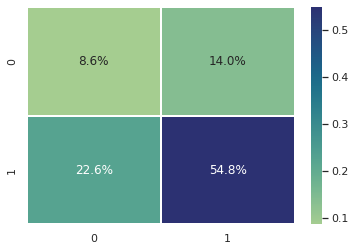

In [ ]:
# Now we use the optimal number of K that gives the best result
knn = KNeighborsClassifier(8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
revealer = confusion_matrix(y_pred, y_test)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

<a href = 'https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea'>Read more on Confusion Matrix Visualization</a> <br>
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>Read more on K Nearest Neighbour Documentation</a><br>
<a href = 'https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4'>Read more on K Nearest Neighbour Implementation</a> <br>


<hr>

<hr>
<h3>DECISION TREE</h3>
The decision tree is a very popular machine learning algorithm. It works for both linear and non-linear data. Also, it can be used for both classification and regression. <br>
Decision tree works by recursively splitting the data into subsets based on the values of its features or attributes, and uses the resulting tree structure to make predictions or classifications. It selects one of the features (based on some calculations), splits the variables that are in that particular features, then make further trees (nodes) from it which gives birth to some other trees (nodes), this process continues until all features has been covered and the last tree (leaf node) has been reached.
<ul><li>Root Node: This is the begining of the decision tree. The first feature that start splitting the data </li>
<li>Internal Node: This is also called Decision Node because it represents decision based on the value of a feature. Internal Node represents a feature or attribute of the data being used for classification, each branch from that node represents a possible value of that feature.</li>
<li>Leaf Node: This is the node where the decision tree makes final decisions and no further splitting is possible.</li></ul><br>
There are many features in the dataset, so how does the algorithm choose the feature for the starting root node. This is done by calculating the Information Gain. What is Information Gain therefore? Information Gain is a measure of how much the knowledge of a particular feature improves our ability to classify or predict outcomes. It also helps decide which feature is good as a root node. ON the other hand, Purity refers to the degree to which a set of data is composed of a single class or category. In other words, if all the examples in a subset of the data belong to the same class, that subset is considered to be "pure". If the examples in a subset belong to multiple classes, it is considered to be impure. These are the types of Information Gain:<br>
-- Information gain<br>
-- Gain Ratio<br>
-- Gini Index<br>
The Information Gain is measured, feature with the highest information gain is selected, then it becomes the root node from which other decision trees are formed. These trees continues to be create until the last node is reached (leaf node).
<br><br><br>
<a href = "https://regenerativetoday.com/simple-explanation-on-how-decision-tree-algorithm-makes-decisions/">Further Reading 1 on Decision Tree</a><br>
<a href = "https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/">Further Reading 2 on Decision Tree</a><br>
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Further Reading on Decision Tree HyperParameters</a>


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# Model Creation
tree_model.fit(x_train, y_train)

# Predict the test data for checking accuracy
prediction = tree_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        29
           1       0.79      0.77      0.78        64

    accuracy                           0.70        93
   macro avg       0.65      0.66      0.66        93
weighted avg       0.70      0.70      0.70        93



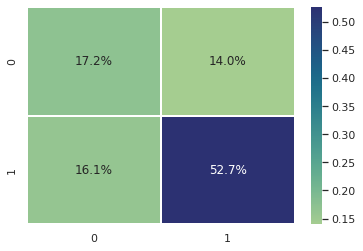

In [ ]:
tree_model_predict = tree_model.predict(x_test)
print(classification_report(y_test, tree_model_predict))
revealer = confusion_matrix(y_test, tree_model_predict)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

<hr>

<hr>
<h3>RANDOM FOREST</h3>
A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning. We know that a forest comprises numerous trees, and the more trees more it will be robust. Similarly, the greater the number of trees in a Random Forest Algorithm, the higher its accuracy and problem-solving ability.  Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. It is based on the concept of ensemble learning which is a process of combining multiple classifiers to solve a complex problem and improve the performance of the model. Random forest is a popular ensemble learning algorithm used for classification and regression tasks. It works by combining multiple decision trees to create a more robust and accurate model.
Here are the general steps of how a random forest algorithm works:
<ul><li>
Selecting random samples from the dataset: The algorithm randomly selects a set of data points from the dataset to use as the training set for each decision tree. This process is called bootstrap sampling, where each decision tree is trained on a different subset of the data.</li>
<li>
Building decision trees: The algorithm builds multiple decision trees by splitting the data into smaller subsets based on certain features. Each decision tree is trained using a different set of features, and the splits are chosen based on the feature that provides the most information gain.</li>
<li>
Combining decision trees: Once all the decision trees are built, the algorithm combines them into a random forest by taking the average of their predictions. For classification tasks, the algorithm counts the number of votes each class receives from the different decision trees and chooses the class with the most votes as the final prediction.</li>
<li>
Evaluating the performance: The performance of the random forest is evaluated using a separate test set of data that was not used for training. The algorithm calculates the accuracy or error rate of the model on this test set, and the performance can be improved by adjusting the parameters of the model.</li></ul><br>
The random forest algorithm is beneficial because it reduces overfitting by using multiple decision trees, which helps to increase the accuracy of the model. Additionally, it can handle a large number of features and works well with both numerical and categorical data.<br><br>
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Further Reading on Random Forest Documentation</a><br>
<a href = "https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/">Further Reading on Random Forest Explanation</a><br>


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
# Model Creation
rf_model.fit(x_train, y_train)

# Predict the test data for checking accuracy
prediction = rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.75      0.52      0.61        29
           1       0.81      0.92      0.86        64

    accuracy                           0.80        93
   macro avg       0.78      0.72      0.74        93
weighted avg       0.79      0.80      0.78        93



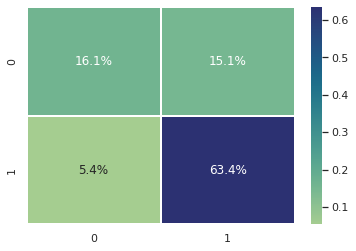

In [ ]:
rf_model_predict = rf_model.predict(x_test)
print(classification_report(y_test, rf_model_predict))
revealer = confusion_matrix(y_test, rf_model_predict)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)